#**Import required libraries**

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression


#**Read house_dataset csv file and print the statistical information about data**

In [131]:
train = pd.read_csv('houses_dataset.csv')
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#**print data information** 

In [132]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#**Check for skewness of our Target feature**

Skew is: 1.8828757597682129


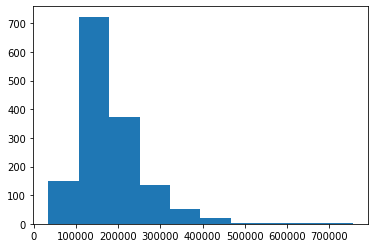

In [133]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train["SalePrice"])
plt.show()

#**Apply np.log to distribute data**

skew is 0.12133506220520406


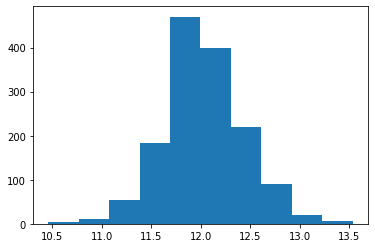

In [134]:
target = np.log(train.SalePrice)
print('skew is', target.skew())
plt.hist(target)
plt.show()

# **Working with Numeric Features**

### **Finding the most Pos/Neg correlation**


In [135]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print("Positive Correlation:")
print(corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print("\nNegative Correlation:")
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

Positive Correlation:
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 


Negative Correlation:
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


# **Median sales price strictly increases as Overall Quality increases.**


In [136]:
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', 
                                  aggfunc=np.median)
print(quality_pivot)

             SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               269750
9               345000
10              432390


# **Plot graph to show Median sales price increases as Overall Quality increases.**

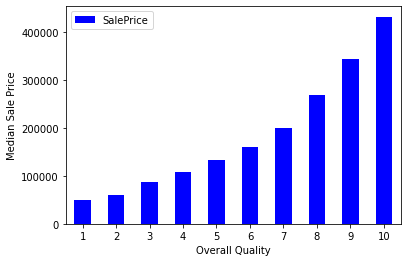

In [137]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

# **Null values**
### **count null values in each column**


In [138]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:5])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

             Null Count
Feature                
PoolQC             1453
MiscFeature        1406
Alley              1369
Fence              1179
FireplaceQu         690


##**handling missing value**

**interpolate(): Fill NaN values using an interpolation method.**

**dropna(): Remove missing values.**


In [139]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
print(sum(data.isnull().sum() != 0))

0


## **Wrangling the non-numeric Feature**

In [140]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


# **Scatterplot graph function**

In [141]:
def scatter_plot(x_data_input, y_data_input, x_label, y_label, figure_label):
    '''
    :param x_data_input: x - axis
    :param y_data_input: y- axis
    :param x_label: x-label
    :param y_label: y-label
    :param figure_label: figure name
    :return: N/A
    '''
    plt.scatter(x_data_input, y_data_input)
    plt.title(figure_label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

#**Scatterplot for GarageArea vs Saleprice**


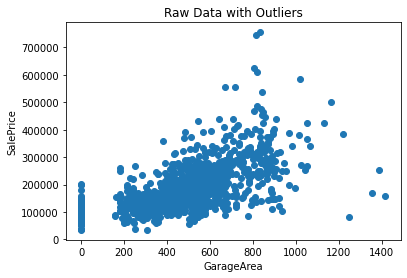

In [142]:
x_data = data["GarageArea"]
y_data = data["SalePrice"]
scatter_plot(x_data, y_data, 'GarageArea', 'SalePrice', 'Raw Data with Outliers')

# **1. Delete all the outlier data for the GarageArea field** 

  **1. Calculate Z scores of the data**

  **2. Print anomalies**

  **3. Remove all the outliers with Z-score value**

In [143]:
# Cleaning data with z-score.
outlier_data = data[np.abs(stats.zscore(data['GarageArea']) > 3)]
# print outliner sales price
print('printing outlier Garage Area')
print(outlier_data['GarageArea'])
cleaned_data = data[np.abs(stats.zscore(data['GarageArea']) < 3)]
cleaned_data = cleaned_data[np.abs(stats.zscore(cleaned_data['GarageArea']) > -2)]

printing outlier Garage Area
178     1166
581     1390
664     1134
825     1220
1061    1248
1190    1356
1298    1418
Name: GarageArea, dtype: int64


#**Scatter plot after removing outliers**

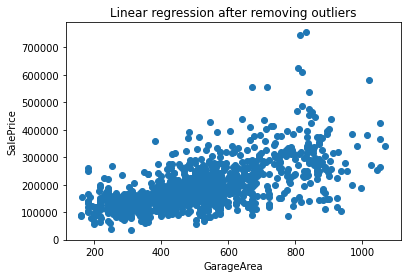

In [144]:
# Plot the cleaned data to see there are no outlier data.
x_data = cleaned_data["GarageArea"]
y_data = cleaned_data["SalePrice"]
scatter_plot(x_data, y_data, 'GarageArea', 'SalePrice', 'Linear regression after removing outliers')

In [145]:
x_data

0       548
1       460
2       608
3       642
4       836
       ... 
1455    460
1456    500
1457    252
1458    240
1459    276
Name: GarageArea, Length: 1372, dtype: int64

#**2. Evaluate the regression model using MAE, MSE, RMSE and R2 score**

**1. Build the model and split test and train data**

**2. fit the model**

**3. find the prediction**

**4. Evaluate MAE,MSE,RMSE and R2 score**

In [146]:
X = cleaned_data.drop(['SalePrice'], axis=1)
y = np.log(cleaned_data.SalePrice)


# Split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

#fit the model
linear_regression = LinearRegression()
model = linear_regression.fit(X_train, y_train)

# find prediction
y_pred = model.predict(X_test)

In [147]:
#Evaluate the model performance

import sklearn.metrics as metrics

# Caluculate MAE, MSE, RMSE and R2 score
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
r2 = model.score(X_test, y_test)

# print results
print("Results of Model Evaluation: ")
print("\nMean Absolute error (MAE):", mae)
print("\nMean squared error regression loss (MSE):", mse)
print("\nRoot Mean squared error (RMSE):", rmse)
print("\nR^2 Score:", r2)

Results of Model Evaluation: 

Mean Absolute error (MAE): 0.09486955712984813

Mean squared error regression loss (MSE): 0.01624659854676684

Root Mean squared error (RMSE): 0.1274621455443413

R^2 Score: 0.8916925341381207


# **3. Using simple regression select one feature that is positively correlated with 'SalePrice' create a regression model and Plot the regression line between the two features.**

1. Created new dataframe with 'Garage area' and 'SalePrice' column

2. Build linear regression model

3. Plot regression line between 'Garage area' and 'SalePrice'

In [148]:
new_df = pd.DataFrame(train, columns = ['GarageArea', 'SalePrice'])

In [149]:
# Build a linear model
X = new_df.drop(['SalePrice'], axis=1)
y = np.log(new_df.SalePrice)


# Split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

#fit the model
linear_regression = LinearRegression()
model = linear_regression.fit(X_train, y_train)

# find prediction
y_pred = model.predict(X_test)

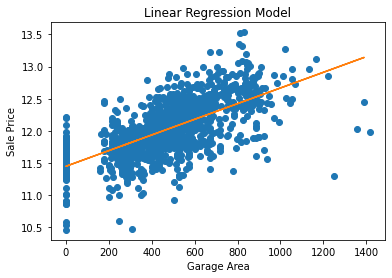

In [150]:
plt.plot(X,y,'o')

# Plot Regression line
plt.plot(X_test, y_pred, '-')
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.title('Linear Regression Model')
plt.show()